In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [3]:
riders = pd.read_csv("data/Riders.csv")
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [4]:
sample = pd.read_csv("data/SampleSubmission.csv")
sample.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [5]:
test = pd.read_csv("data/Test.csv")
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [6]:
test.shape

(7068, 25)

In [7]:
test.dtypes

Order No                                 object
User Id                                  object
Vehicle Type                             object
Platform Type                             int64
Personal or Business                     object
Placement - Day of Month                  int64
Placement - Weekday (Mo = 1)              int64
Placement - Time                         object
Confirmation - Day of Month               int64
Confirmation - Weekday (Mo = 1)           int64
Confirmation - Time                      object
Arrival at Pickup - Day of Month          int64
Arrival at Pickup - Weekday (Mo = 1)      int64
Arrival at Pickup - Time                 object
Pickup - Day of Month                     int64
Pickup - Weekday (Mo = 1)                 int64
Pickup - Time                            object
Distance (KM)                             int64
Temperature                             float64
Precipitation in millimeters            float64
Pickup Lat                              

In [8]:
test = test.drop_duplicates()

In [9]:
rename = {}
rename['Order No'] = 'order_number'
rename['User Id'] = 'user_id'
rename['Vehicle Type'] = 'vehicle_type'
rename['Platform Type'] = 'platform_type'
rename['Personal or Business'] = 'personal_or_business'
rename['Placement - Day of Month'] = 'placement_day_of_month'
rename['Placement - Weekday (Mo = 1)'] = 'placement_day_of_week'
rename['Placement - Time'] = 'placement_time'
rename['Confirmation - Day of Month'] = 'confirmation_day_of_month'
rename['Confirmation - Weekday (Mo = 1)'] = 'confirmation_day_of_weekday'
rename['Confirmation - Time'] = 'confirmation_time'
rename['Arrival at Pickup - Day of Month'] = 'arrival_day_of_month'
rename['Arrival at Pickup - Weekday (Mo = 1)'] = 'arrival_day_of_week'
rename['Arrival at Pickup - Time'] = 'arrival_time'
rename['Pickup - Day of Month'] = 'pickup_day_of_month'
rename['Pickup - Weekday (Mo = 1)'] = 'pickup_day_of_week'
rename['Pickup - Time'] = 'pickup_time'
rename['Distance (KM)'] = 'distance_km'
rename['Temperature'] = 'temperature'
rename['Precipitation in millimeters'] = 'precipitation_mm'
rename['Pickup Lat'] = 'pickup_lat'
rename['Pickup Long'] = 'pickup_long'
rename['Destination Lat'] = 'destination_lat'
rename['Destination Long'] = 'destination_long'
rename['Rider Id'] = 'rider_id'

test = test.rename(rename,  axis='columns')

In [10]:
test = test.astype({"vehicle_type": "category", "personal_or_business": "category"})

In [11]:
test["order_number"] = test["order_number"].str.replace("Order_No_", "").astype(int)
test["user_id"] = test["user_id"].str.replace("User_Id_", "").astype(int)
test["rider_id"] = test["rider_id"].str.replace("Rider_Id_", "").astype(int)

<AxesSubplot:>

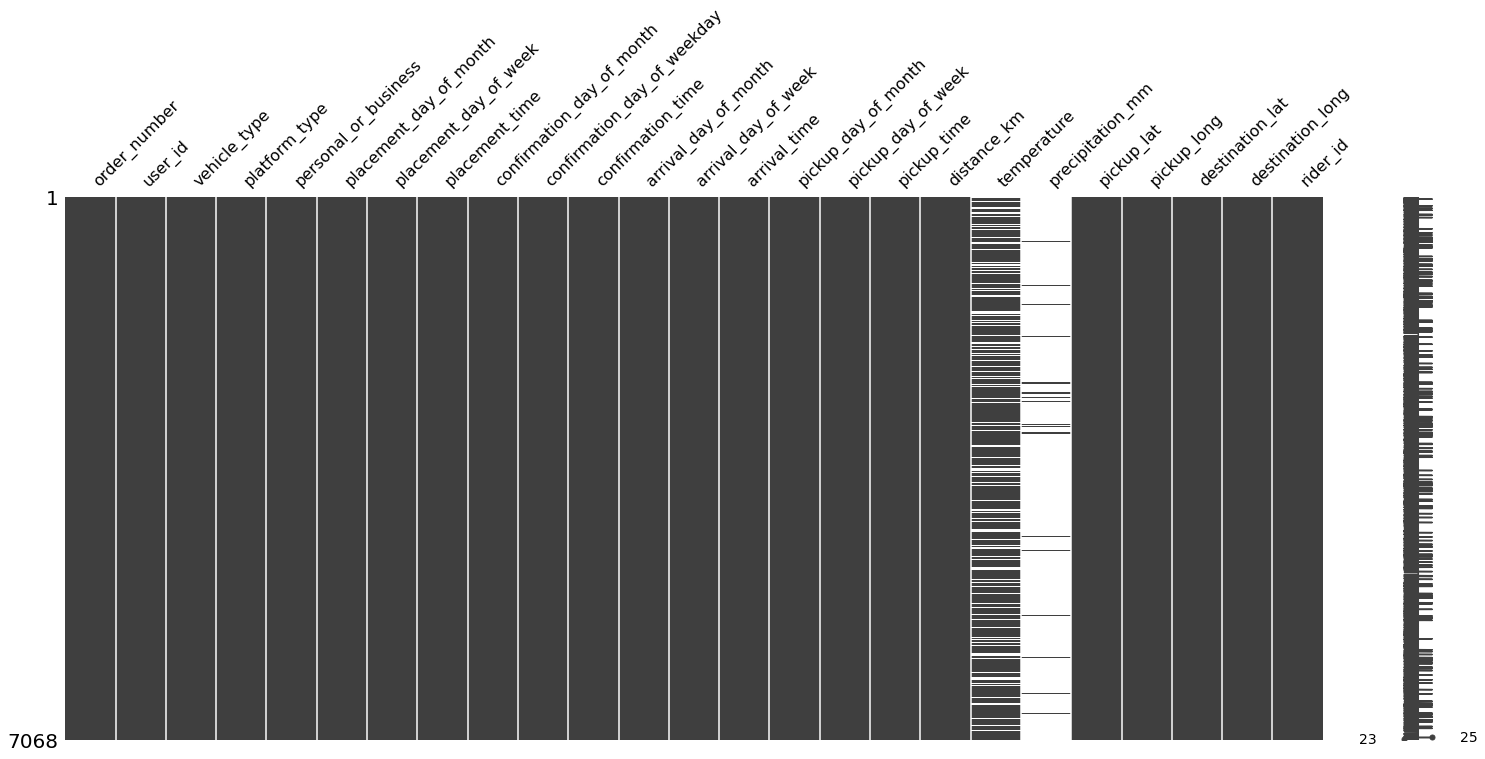

In [12]:
msno.matrix(test)

In [13]:
test.drop(columns="precipitation_mm", inplace=True)
test.temperature.fillna(test.temperature.mean(), inplace=True)

In [14]:
test.head()

,order_number,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_day_of_week,placement_time,confirmation_day_of_month,confirmation_day_of_weekday,...,pickup_day_of_month,pickup_day_of_week,pickup_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id
0,19248,3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,27,3,5:06:47 PM,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,192
1,12736,3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,17,5,1:25:37 PM,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,868
2,768,2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,27,4,11:57:54 AM,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,26
3,15332,2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,17,1,2:16:52 PM,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,685
4,21373,1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,11,2,11:56:04 AM,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,858


In [19]:
test.groupby('platform_type').distance_km.mean()

platform_type
1    9.451477
2    8.937500
3    9.489776
4    8.666667
Name: distance_km, dtype: float64

In [20]:
test.groupby('vehicle_type').distance_km.mean()

vehicle_type
Bike    9.45897
Name: distance_km, dtype: float64

In [ ]:
test.group

In [16]:
train = pd.read_csv("data/Train.csv")
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [17]:
variable = pd.read_csv("data/VariableDefinitions.csv")
variable.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
